In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


['.config', 'heart_2020_cleaned.csv', 'sample_data']


In [ ]:
dataset = pd.read_csv("heart_2020_cleaned.csv")

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.shape

(319795, 18)

In [ ]:
dataset.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [ ]:
dataset.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
56084,No,24.80,No,No,No,30,0,No,Female,70-74,White,No,No,Very good,6,No,No,Yes
245297,No,28.89,No,No,No,7,0,No,Male,50-54,White,No,Yes,Excellent,8,No,No,No
268187,No,39.47,No,No,No,0,0,No,Female,30-34,Hispanic,No,Yes,Very good,8,No,No,No
121912,No,25.77,No,No,No,0,5,No,Male,25-29,White,No,Yes,Very good,7,No,No,No
120796,No,33.89,Yes,No,No,0,10,No,Female,55-59,White,No,No,Good,12,No,No,No


In [ ]:
dataset.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
dataset['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [ ]:
dataset['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
dataset['Smoking'].value_counts()

No     187887
Yes    131908
Name: Smoking, dtype: int64

In [ ]:
dataset['AlcoholDrinking'].value_counts()

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64

In [ ]:
dataset['Stroke'].value_counts()

No     307726
Yes     12069
Name: Stroke, dtype: int64

In [ ]:
dataset['DiffWalking'].value_counts()

No     275385
Yes     44410
Name: DiffWalking, dtype: int64

In [ ]:
dataset['Sex'].value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

In [ ]:
dataset['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [ ]:
dataset['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [ ]:
dataset['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [ ]:
dataset['PhysicalActivity'].value_counts()

Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64

In [ ]:
dataset['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [ ]:
dataset['Asthma'].value_counts()

No     276923
Yes     42872
Name: Asthma, dtype: int64

In [ ]:
dataset['KidneyDisease'].value_counts()

No     308016
Yes     11779
Name: KidneyDisease, dtype: int64

In [ ]:
dataset['SkinCancer'].value_counts()

No     289976
Yes     29819
Name: SkinCancer, dtype: int64

In [ ]:
for col in dataset:
  if dataset[col].dtype =='object':
    dataset[col]=LabelEncoder().fit_transform(dataset[col])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [ ]:
dataset['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [ ]:
dataset['Smoking'].value_counts()

0    187887
1    131908
Name: Smoking, dtype: int64

In [ ]:
dataset['AlcoholDrinking'].value_counts()

0    298018
1     21777
Name: AlcoholDrinking, dtype: int64

In [ ]:
dataset['Stroke'].value_counts()

0    307726
1     12069
Name: Stroke, dtype: int64

In [ ]:
dataset['DiffWalking'].value_counts()

0    275385
1     44410
Name: DiffWalking, dtype: int64

In [ ]:
dataset['Sex'].value_counts()

0    167805
1    151990
Name: Sex, dtype: int64

In [ ]:
dataset['AgeCategory'].value_counts()

9     34151
8     33686
10    31065
7     29757
6     25382
12    24153
5     21791
11    21482
0     21064
4     21006
3     20550
2     18753
1     16955
Name: AgeCategory, dtype: int64

In [ ]:
dataset['Race'].value_counts()

5    245212
3     27446
2     22939
4     10928
1      8068
0      5202
Name: Race, dtype: int64

In [ ]:
dataset['Diabetic'].value_counts()

0    269653
2     40802
1      6781
3      2559
Name: Diabetic, dtype: int64

In [ ]:
dataset['PhysicalActivity'].value_counts()

1    247957
0     71838
Name: PhysicalActivity, dtype: int64

In [ ]:
dataset['Asthma'].value_counts()

0    276923
1     42872
Name: Asthma, dtype: int64

In [ ]:
dataset['GenHealth'].value_counts()

4    113858
2     93129
0     66842
1     34677
3     11289
Name: GenHealth, dtype: int64

In [ ]:
dataset['KidneyDisease'].value_counts()

0    308016
1     11779
Name: KidneyDisease, dtype: int64

In [ ]:
dataset['SkinCancer'].value_counts()

0    289976
1     29819
Name: SkinCancer, dtype: int64

In [ ]:
dataset["HeartDisease"].describe()

count    319795.000000
mean          0.085595
std           0.279766
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: HeartDisease, dtype: float64

## EDA

In [ ]:
print(dataset.corr()["HeartDisease"].abs().sort_values(ascending=False))

HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
PhysicalActivity    0.100030
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
AlcoholDrinking     0.032080
MentalHealth        0.028591
GenHealth           0.011062
SleepTime           0.008327
Name: HeartDisease, dtype: float64


In [ ]:
y = dataset["HeartDisease"]
target_temp = dataset.HeartDisease.value_counts()
print(target_temp)

0    292422
1     27373
Name: HeartDisease, dtype: int64


<Axes: xlabel='HeartDisease', ylabel='count'>

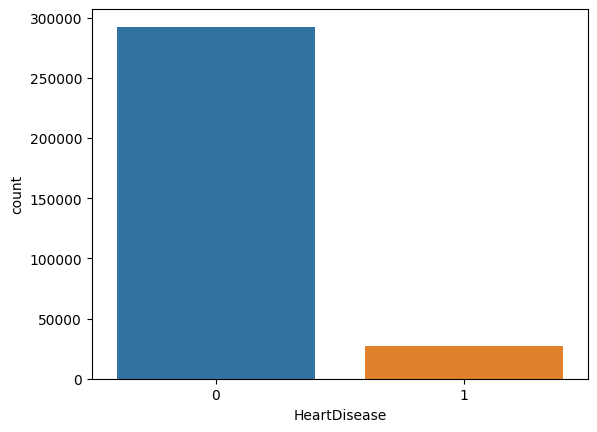

In [ ]:
sns.countplot(x=dataset["HeartDisease"])

In [ ]:
dataset.drop(['Race'], axis=1)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,0,1,4,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,1,8,2,0,1,6,1,0,0
319791,0,29.84,1,0,0,0,0,0,1,3,0,1,4,5,1,0,0
319792,0,24.24,0,0,0,0,0,0,0,5,0,1,2,6,0,0,0
319793,0,32.81,0,0,0,0,0,0,0,1,0,0,2,12,0,0,0


In [ ]:
#sns.countplot(x=y_train)

NameError: ignored

In [ ]:
#sns.countplot(x=y_train_adas)

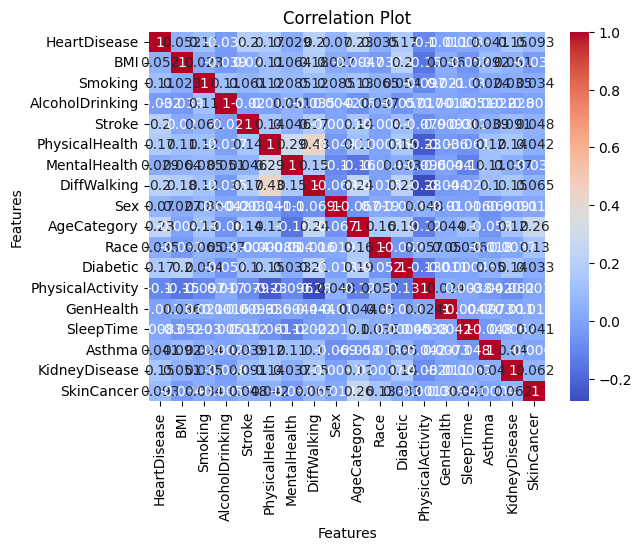

In [ ]:
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Plot')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split
y = dataset['HeartDisease']
X = dataset.loc[:, dataset.columns != 'HeartDisease']

In [ ]:
# Apply ADASYN oversampling to the train set
adasyn = ADASYN(random_state=42)
X_train, y_train = adasyn.fit_resample(X, y)


In [ ]:
target_temp = y_train.value_counts()
print(target_temp)

1    294563
0    292422
Name: HeartDisease, dtype: int64


In [ ]:
X_train_adas, X_test_adas, y_train_adas, y_test_adas = train_test_split(X_train,y_train, random_state=42)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_adas,y_train_adas)
Y_pred_lr = lr.predict(X_test_adas)

In [ ]:
Y_pred_lr.shape

(146747,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,y_test_adas)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 72.57 %


Decision Tree using gini

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(criterion="gini")
dt1.fit(X_train_adas,y_train_adas)
Y_pred_dt1 = dt1.predict(X_test_adas)

In [ ]:
Y_pred_dt1.shape

(146747,)

In [ ]:
score_dt1 = round(accuracy_score(Y_pred_dt1,y_test_adas)*100,2)
print("The accuracy score achieved using Decision Tree(gini) is: "+str(score_dt1)+" %")

The accuracy score achieved using Decision Tree(gini) is: 84.22 %


Decision Tree using entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(criterion="entropy")
dt2.fit(X_train_adas,y_train_adas)
Y_pred_dt2 = dt2.predict(X_test_adas)

In [ ]:
Y_pred_dt2.shape

(146747,)

In [ ]:
score_dt2 = round(accuracy_score(Y_pred_dt2,y_test_adas)*100,2)
print("The accuracy score achieved using Decision Tree(entropy) is: "+str(score_dt2)+" %")

The accuracy score achieved using Decision Tree(entropy) is: 84.3 %


Random Forest using Gini

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_gini = RandomForestClassifier(criterion="gini")
rf_gini.fit(X_train_adas,y_train_adas)
Y_pred_rf_gini = rf_gini.predict(X_test_adas)

In [ ]:
Y_pred_rf_gini.shape

(146747,)

In [ ]:
score_rf_gini = round(accuracy_score(Y_pred_rf_gini,y_test_adas)*100,2)
print("The accuracy score achieved using Random Forest(gini) is: "+str(score_rf_gini)+" %")

The accuracy score achieved using Random Forest(gini) is: 88.21 %


Random Forest using entropy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_ent = RandomForestClassifier(criterion="entropy")
rf_ent.fit(X_train_adas,y_train_adas)
Y_pred_rf_ent = rf_ent.predict(X_test_adas)

In [ ]:
Y_pred_rf_ent.shape

(146747,)

In [ ]:
score_rf_ent = round(accuracy_score(Y_pred_rf_ent,y_test_adas)*100,2)
print("The accuracy score achieved using Random Forest(gini) is: "+str(score_rf_ent)+" %")

The accuracy score achieved using Random Forest(gini) is: 88.1 %


light GBM

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lightgbm as lgb

In [ ]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train_adas,y_train_adas,eval_set=[(X_test_adas,y_test_adas),(X_train_adas,y_train_adas)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.521518	valid_0's binary_logloss: 0.521907
[40]	training's binary_logloss: 0.495991	valid_0's binary_logloss: 0.4968
[60]	training's binary_logloss: 0.486133	valid_0's binary_logloss: 0.487358
[80]	training's binary_logloss: 0.478814	valid_0's binary_logloss: 0.480625
[100]	training's binary_logloss: 0.473795	valid_0's binary_logloss: 0.476177


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
print('Training accuracy {:.4f}'.format(model.score(X_train_adas,y_train_adas)))
print('Testing accuracy {:.4f}'.format(model.score(X_test_adas,y_test_adas)))

Training accuracy 0.7728
Testing accuracy 0.7717


In [ ]:
score_lgb=83.60

XGBoost

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_adas, y_train_adas)
Y_pred_xgb = xgb_model.predict(X_test_adas)

In [ ]:
Y_pred_xgb.shape

(146747,)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,y_test_adas)*100,2)
print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 82.18 %


Voting

In [ ]:
import numpy as np

final = np.zeros(146747)
print(final)

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
for i in range(0,146747):
  c0 = 0
  c1 = 0

  if(Y_pred_dt1[i] == 0):
    c0 = c0 + 1
  else:
    c1 = c1 + 1
  if(Y_pred_dt2[i] == 0):
    c0 = c0 + 1
  else:
    c1 = c1 + 1
  if(Y_pred_rf_ent[i] == 0):
    c0 = c0 + 1
  else:
    c1 = c1 + 1
  if(Y_pred_rf_gini[i] == 0):
    c0 = c0 + 1
  else:
    c1 = c1 + 1
  if(Y_pred_xgb[i] == 0):
    c0 = c0 + 1
  else:
    c1 = c1 + 1

  if(c0 > c1):
    final[i] = 0
  else:
    final[i] = 1

In [ ]:
score_voting = round(accuracy_score(final,y_test_adas)*100,2)
print("The accuracy score achieved using Voting is: "+str(score_voting)+" %")

The accuracy score achieved using Voting is: 88.17 %


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_adas,y_train_adas)
Y_pred_knn=knn.predict(X_test_adas)

In [ ]:
Y_pred_knn.shape

(146747,)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,y_test_adas)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 83.34 %


Random under sampling

In [ ]:
from sklearn.model_selection import train_test_split
y = dataset['HeartDisease']
X = dataset.loc[:, dataset.columns != 'HeartDisease']

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy=0.4)
X_under, y_under = under_sampler.fit_resample(X, y)

In [ ]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler().fit(X_train)
#transform the data such that its distribution will have a mean value 0 and standard deviation of 1
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_under = LogisticRegression()
lr_under.fit(X_train,y_train)
Y_pred_lr_under = lr_under.predict(X_test)

In [ ]:
Y_pred_lr_under.shape

(28742,)

In [ ]:
score_lr_under = round(accuracy_score(Y_pred_lr_under,y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr_under)+" %")

The accuracy score achieved using Logistic Regression is: 78.03 %


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_under = KNeighborsClassifier(n_neighbors=7)
knn_under.fit(X_train,y_train)
Y_pred_knn_under=knn.predict(X_test)

In [ ]:
Y_pred_knn_under.shape

(28742,)

In [ ]:
score_knn_under = round(accuracy_score(Y_pred_knn_under,y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn_under)+" %")

The accuracy score achieved using KNN is: 71.48 %


XGboost


In [ ]:
import xgboost as xgb
xgb_model_under = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model_under.fit(X_train, y_train)
Y_pred_xgb_under = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb_under.shape

(28742,)

In [ ]:
score_xgb_under = round(accuracy_score(Y_pred_xgb_under,y_test)*100,2)
print("The accuracy score achieved using XGBoost is: "+str(score_xgb_under)+" %")

The accuracy score achieved using XGBoost is: 70.06 %


Decision Tree using gini

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt1_under = DecisionTreeClassifier(criterion="gini")
dt1_under.fit(X_train,y_train)
Y_pred_dt1_under = dt1.predict(X_test)

In [ ]:
Y_pred_dt1_under.shape

(28742,)

In [ ]:
score_dt1_under = round(accuracy_score(Y_pred_dt1_under,y_test)*100,2)
print("The accuracy score achieved using Decision Tree(gini) is: "+str(score_dt1_under)+" %")

The accuracy score achieved using Decision Tree(gini) is: 70.96 %


Decision Tree using entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt2_under = DecisionTreeClassifier(criterion="entropy")
dt2_under.fit(X_train,y_train)
Y_pred_dt2_under = dt2.predict(X_test)

In [ ]:
Y_pred_dt2_under.shape

(28742,)

In [ ]:
score_dt2_under = round(accuracy_score(Y_pred_dt2_under,y_test)*100,2)
print("The accuracy score achieved using Decision Tree(entropy) is: "+str(score_dt2_under)+" %")

The accuracy score achieved using Decision Tree(entropy) is: 71.88 %


Random Forest using Gini

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_gini_under = RandomForestClassifier(criterion="gini")
rf_gini_under.fit(X_train,y_train)
Y_pred_rf_gini_under = rf_gini.predict(X_test)

In [ ]:
Y_pred_rf_gini_under.shape

(28742,)

In [ ]:
score_rf_gini_under = round(accuracy_score(Y_pred_rf_gini_under,y_test)*100,2)
print("The accuracy score achieved using Random Forest(gini) is: "+str(score_rf_gini_under)+" %")

The accuracy score achieved using Random Forest(gini) is: 71.48 %


Random Forest using entropy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_ent_under = RandomForestClassifier(criterion="entropy")
rf_ent_under.fit(X_train,y_train)
Y_pred_rf_ent_under = rf_ent.predict(X_test)

In [ ]:
Y_pred_rf_ent_under.shape

(28742,)

In [ ]:
score_rf_ent_under = round(accuracy_score(Y_pred_rf_ent_under,y_test)*100,2)
print("The accuracy score achieved using Random Forest(gini) is: "+str(score_rf_ent_under)+" %")

The accuracy score achieved using Random Forest(gini) is: 71.49 %


Voting

In [ ]:
import numpy as np

final_under = np.zeros(28742)
print(final_under)

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
for i in range(0,28742):
  c0_under = 0
  c1_under = 0

  if(Y_pred_lr_under[i] == 0):
    c0_under = c0_under + 1
  else:
    c1_under = c1_under + 1
  if(Y_pred_knn_under[i] == 0):
    c0_under = c0_under + 1
  else:
    c1_under = c1_under + 1
  if(Y_pred_rf_ent_under[i] == 0):
    c0_under = c0_under + 1
  else:
    c1_under = c1_under + 1
  if(Y_pred_rf_gini_under[i] == 0):
    c0_under = c0_under + 1
  else:
    c1_under = c1_under + 1
  if(Y_pred_xgb_under[i] == 0):
    c0_under = c0_under + 1
  else:
    c1_under = c1_under + 1

  if(c0 > c1):
    final_under[i] = 0
  else:
    final_under[i] = 1

In [ ]:
score_voting_under = round(accuracy_score(final_under,y_test)*100,2)
print("The accuracy score achieved using Voting is: "+str(score_voting_under)+" %")

The accuracy score achieved using Voting is: 71.48 %


Final output graph


using ADASYN

In [ ]:
scores = [score_lr,score_dt1,score_dt2,score_knn,score_rf_gini,score_rf_ent,score_xgb,score_lgb,score_voting]
algorithms = ["Logistic Regression","DT:gini","DT:entropy","K-Nearest Neighbors","RF:gini","RF:entropy","XGBoost","LightGradientBoosting","voting"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 72.57 %
The accuracy score achieved using DT:gini is: 84.22 %
The accuracy score achieved using DT:entropy is: 84.3 %
The accuracy score achieved using K-Nearest Neighbors is: 83.34 %
The accuracy score achieved using RF:gini is: 88.21 %
The accuracy score achieved using RF:entropy is: 88.1 %
The accuracy score achieved using XGBoost is: 82.18 %
The accuracy score achieved using LightGradientBoosting is: 83.6 %
The accuracy score achieved using voting is: 88.17 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

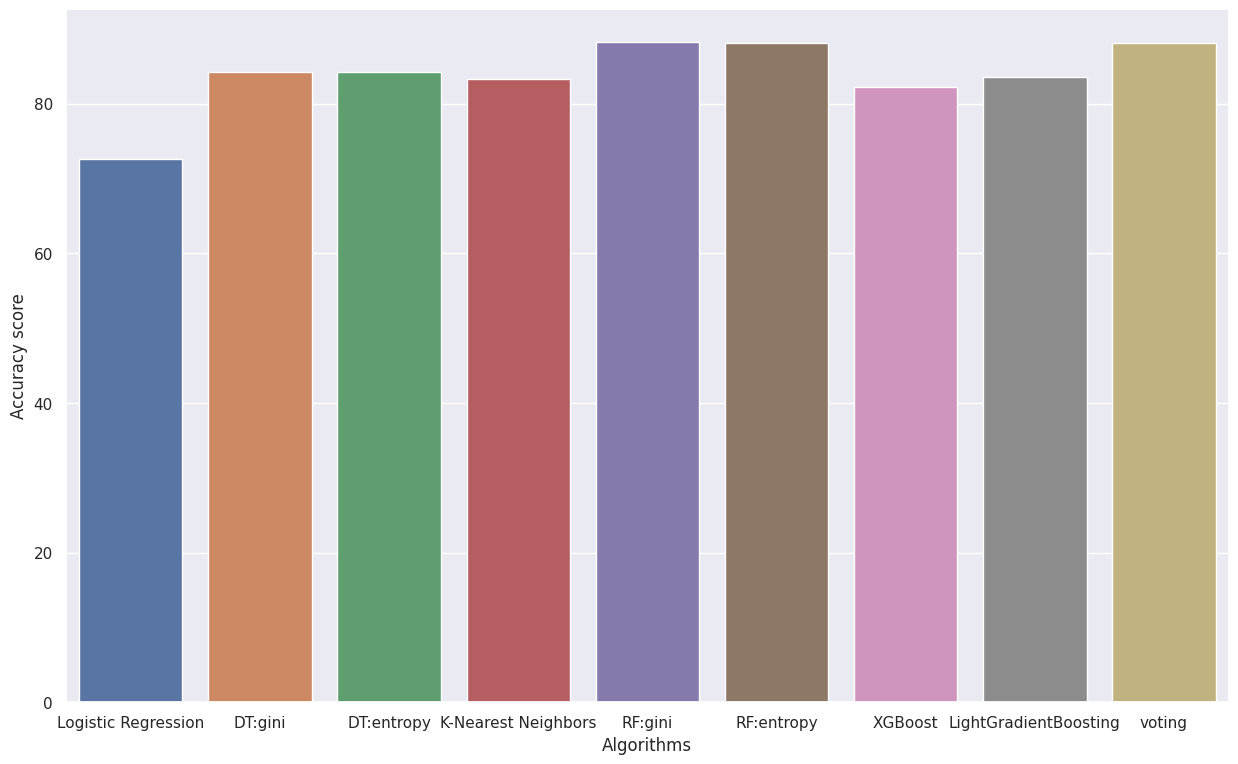

In [ ]:
sns.set(rc={'figure.figsize':(15,9)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

Under Sampling

In [ ]:
scores_under = [score_lr_under,score_dt1_under,score_dt2_under,score_knn_under,score_rf_gini_under,score_rf_ent_under,score_xgb_under,score_voting_under]
algorithms_under = ["Logistic Regression","DT:gini","DT:entropy","K-Nearest Neighbors","RF:gini","RF:entropy","XGBoost","voting"]

for i in range(len(algorithms_under)):
    print("The accuracy score achieved using "+algorithms_under[i]+" is: "+str(scores_under[i])+" %")

The accuracy score achieved using Logistic Regression is: 78.03 %
The accuracy score achieved using DT:gini is: 70.96 %
The accuracy score achieved using DT:entropy is: 71.88 %
The accuracy score achieved using K-Nearest Neighbors is: 71.48 %
The accuracy score achieved using RF:gini is: 71.48 %
The accuracy score achieved using RF:entropy is: 71.49 %
The accuracy score achieved using XGBoost is: 70.06 %
The accuracy score achieved using voting is: 71.48 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

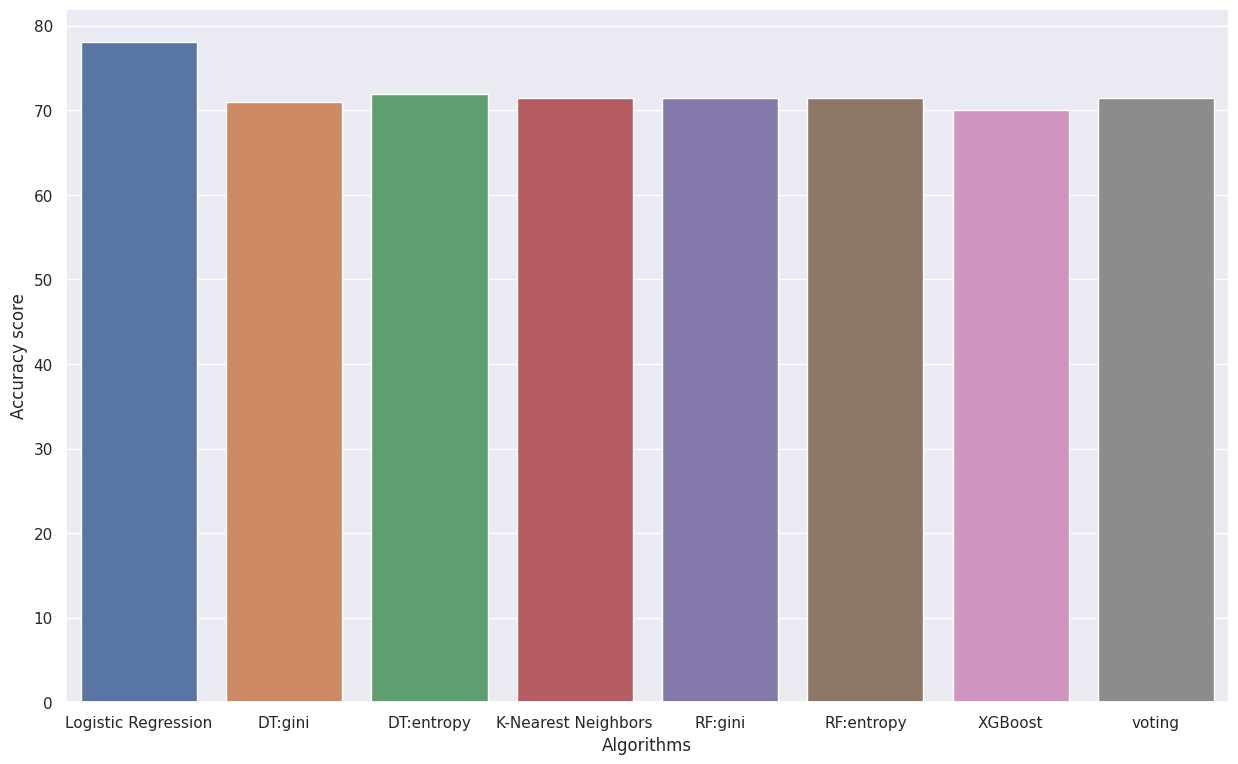

In [ ]:
sns.set(rc={'figure.figsize':(15,9)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms_under,y=scores_under)